## Observations and Insights 

In [ ]:
#Observations:

# #The first observation is that the first two treatments, Capomulin and Ramicane, 
# had the most number of datapoints compared to the rest of the medications.  This, in 
# turn, means that they had the highest number of observations that lived to at least the
# age of 45 days, and therefore can be seen to be more effective than other treatments.

# The second observation is that Infubinol and Ceftamin had much larger inter quartile ranges
# than did Capomulin or Ramicane, meaning that there was much more variance in the values
# of these treatments than the two mentioned in point one above.  This may mean that the results
# of these treatments can be a lot more unpredicatable.

# The final observation is that for the Capomulin regimen, with an r-squared of roughly 0.27, 
# there is a clear positive relationship between rat weight and tumor volume.  This could be
# because of the treatment, because of the natural relationship between the way rats grow (ie
# that as a rat grows it naturally increases in all aspects of size, including tumor volume), 
# or there could be some extranious, ommited variable that is accounts for the relationship. 
# Correlation does not imply causation, and further testing would be required to get at the 
# nature of causality.  We can say, however, that there is a positive relationship between these
# two variables.
                                                                                        

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [89]:
# Checking the number of mice in the DataFrame.
unique_value = merge_df["Mouse ID"].nunique() 
  
# printing value 
print(unique_value)

249


In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = merge_df[merge_df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
print(clean)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [92]:
# Checking the number of mice in the clean DataFrame.
unique_value = clean["Mouse ID"].nunique() 
  
# printing value 
print(unique_value)

248


## Summary Statistics

In [93]:
cap_tumvol = clean.loc[clean["Drug Regimen"] == "Capomulin", :]
ram_tumvol = clean.loc[clean["Drug Regimen"] == "Ramicane", :]
ket_tumvol = clean.loc[clean["Drug Regimen"] == "Ketapril", :]
naf_tumvol = clean.loc[clean["Drug Regimen"] == "Naftisol", :]
zon_tumvol = clean.loc[clean["Drug Regimen"] == "Zoniferol", :]
pla_tumvol = clean.loc[clean["Drug Regimen"] == "Placebo", :]
ste_tumvol = clean.loc[clean["Drug Regimen"] == "Stelasyn", :]
cef_tumvol = clean.loc[clean["Drug Regimen"] == "Ceftamin", :]
inf_tumvol = clean.loc[clean["Drug Regimen"] == "Infubinol", :]
pro_tumvol = clean.loc[clean["Drug Regimen"] == "Propriva", :]

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and
#SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them 
#all together at the end.

cap_tv = cap_tumvol["Tumor Volume (mm3)"]
cap_mean = np.mean(cap_tv)
cap_median = np.median(cap_tv)
cap_var = np.var(cap_tv,ddof = 0)
cap_sd = np.std(cap_tv,ddof = 0)

ram_tv = ram_tumvol["Tumor Volume (mm3)"]
ram_mean = np.mean(ram_tv)
ram_median = np.median(ram_tv)
ram_var = np.var(ram_tv,ddof = 0)
ram_sd = np.std(ram_tv,ddof = 0)

ket_tv = ket_tumvol["Tumor Volume (mm3)"]
ket_mean = np.mean(ket_tv)
ket_median = np.median(ket_tv)
ket_var = np.var(ket_tv,ddof = 0)
ket_sd = np.std(ket_tv,ddof = 0)

naf_tv = naf_tumvol["Tumor Volume (mm3)"]
naf_mean = np.mean(naf_tv)
naf_median = np.median(naf_tv)
naf_var = np.var(naf_tv,ddof = 0)
naf_sd = np.std(naf_tv,ddof = 0)
       
zon_tv = zon_tumvol["Tumor Volume (mm3)"]
zon_mean = np.mean(zon_tv)
zon_median = np.median(zon_tv)
zon_var = np.var(zon_tv,ddof = 0)
zon_sd = np.std(zon_tv,ddof = 0)

pla_tv = pla_tumvol["Tumor Volume (mm3)"]
pla_mean = np.mean(pla_tv)
pla_median = np.median(pla_tv)
pla_var = np.var(pla_tv,ddof = 0)
pla_sd = np.std(pla_tv,ddof = 0)

ste_tv = ste_tumvol["Tumor Volume (mm3)"]
ste_mean = np.mean(ste_tv)
ste_median = np.median(ste_tv)
ste_var = np.var(ste_tv,ddof = 0)
ste_sd = np.std(ste_tv,ddof = 0)

cef_tv = cef_tumvol["Tumor Volume (mm3)"]
cef_mean = np.mean(cef_tv)
cef_median = np.median(cef_tv)
cef_var = np.var(cef_tv,ddof = 0)
cef_sd = np.std(cef_tv,ddof = 0)

inf_tv = inf_tumvol["Tumor Volume (mm3)"]
inf_mean = np.mean(inf_tv)
inf_median = np.median(inf_tv)
inf_var = np.var(inf_tv,ddof = 0)
inf_sd = np.std(inf_tv,ddof = 0)

pro_tv = pro_tumvol["Tumor Volume (mm3)"]
pro_mean = np.mean(pro_tv)
pro_median = np.median(pro_tv)
pro_var = np.var(pro_tv,ddof = 0)
pro_sd = np.std(pro_tv,ddof = 0)

stats = {
        'Medication': ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva'],
        'Mean': [cap_mean, ram_mean, ket_mean, naf_mean, zon_mean, pla_mean, ste_mean, cef_mean, inf_mean, pro_mean],
        'Median': [cap_median, ram_median, ket_median, naf_median, zon_median, pla_median, ste_median, cef_median, inf_median, pro_median],
        'Variance': [cap_var, ram_var, ket_var, naf_var, zon_var, pla_var, ste_var, cef_var, inf_var, pro_var],
        'Standard Deviation': [cap_sd, ram_sd, ket_sd, naf_sd, zon_sd, pla_sd, ste_sd, cef_sd, inf_sd, pro_sd]
        }
df = pd.DataFrame(stats, columns = ['Medication', 'Mean', 'Median', 'Variance', 'Standard Deviation'])

print(df)

  Medication       Mean     Median   Variance  Standard Deviation
0  Capomulin  40.675741  41.557809  24.839296            4.983904
1   Ramicane  40.216745  40.673236  23.383692            4.835669
2   Ketapril  55.235638  53.698743  68.188930            8.257659
3   Naftisol  54.331565  52.509285  65.817708            8.112811
4  Zoniferol  53.236507  51.818479  48.266689            6.947423
5    Placebo  54.033581  52.288934  60.830138            7.799368
6   Stelasyn  54.233149  52.431737  59.122106            7.689090
7   Ceftamin  52.591172  51.776157  39.069446            6.250556
8  Infubinol  52.884795  51.820584  42.886388            6.548770
9   Propriva  52.320930  50.446266  43.555716            6.599675


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
grouped_treatment = clean.groupby(['Drug Regimen'])
# This method produces everything in a single groupby function.
groupedmean = grouped_treatment["Tumor Volume (mm3)"].mean()
groupedmedian = grouped_treatment["Tumor Volume (mm3)"].median()
groupedvar = grouped_treatment["Tumor Volume (mm3)"].var()
groupedstd = grouped_treatment["Tumor Volume (mm3)"].std()
stats2 = {
        'Mean': groupedmean,
        'Median': groupedmedian,
        'Variance': groupedvar, 
        'Standard Deviation': groupedstd
        }
df2 = pd.DataFrame(stats2, columns = ['Mean', 'Median', 'Variance', 'Standard Deviation'])

print(df2)

                   Mean     Median   Variance  Standard Deviation
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764            4.994774
Ceftamin      52.591172  51.776157  39.290177            6.268188
Infubinol     52.884795  51.820584  43.128684            6.567243
Ketapril      55.235638  53.698743  68.553577            8.279709
Naftisol      54.331565  52.509285  66.173479            8.134708
Placebo       54.033581  52.288934  61.168083            7.821003
Propriva      52.320930  50.446266  43.852013            6.622085
Ramicane      40.216745  40.673236  23.486704            4.846308
Stelasyn      54.233149  52.431737  59.450562            7.710419
Zoniferol     53.236507  51.818479  48.533355            6.966589


## Bar Plots

Text(0.5, 0, 'Drug Regimen')

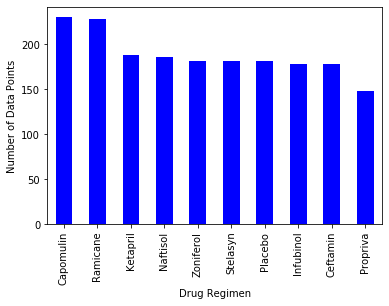

In [96]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pandas.
mousenum = clean["Drug Regimen"].value_counts()
# Configure plot and ticks
mousenum.plot(kind="bar", facecolor="blue")
#plt.title("The Bloodthirst of Kings")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

Text(0, 0.5, 'Number of Data Points')

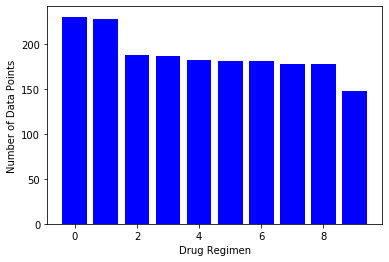

In [97]:
# Generate a bar plot showing the number of mice per time point for each 
#treatment throughout the course of the study using pyplot.
drug = clean["Drug Regimen"]
x_axis = np.arange(len(mousenum))
plt.bar(x_axis, mousenum, color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

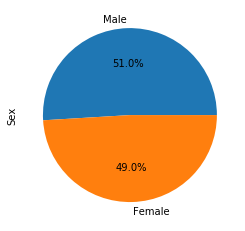

In [98]:
gender= clean["Sex"]
gender.value_counts().plot(kind='pie', autopct='%1.1f%%',)

([<matplotlib.patches.Wedge at 0x1a1b1849b0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

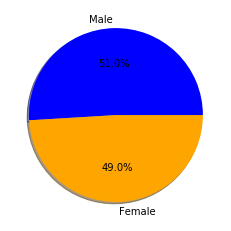

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
malenum = 0
femalenum = 0

for row in gender:
    if row == 'Male':
        malenum = malenum + 1
    
    if row == 'Female':
        femalenum = femalenum+1

total = malenum + femalenum
maleper = (malenum / total)*100
femaleper = (femalenum / total)*100
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [malenum, femalenum]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the most promising 
#treatment regimens. Calculate the IQR and quantitatively determine if there are any 
#potential outliers. 
grouped_df = clean.groupby(['Mouse ID']).max()

treat = grouped_df[["Drug Regimen", "Tumor Volume (mm3)"]]

cap = treat.loc[treat["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
c_quartiles = cap.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq
c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)
print(f"Values below {c_lower_bound} could be outliers for Capomulin.")
print(f"Values above {c_upper_bound} could be outliers for Capomulin.")

ram = treat.loc[treat["Drug Regimen"] == "Ramicane", :]["Tumor Volume (mm3)"]
r_quartiles = ram.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq
r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Values below {r_lower_bound} could be outliers for Ramicane.")
print(f"Values above {r_upper_bound} could be outliers for Ramicane.")

inf = treat.loc[treat["Drug Regimen"] == "Infubinol", :]["Tumor Volume (mm3)"]
i_quartiles = inf.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq
i_lower_bound = i_lowerq - (1.5*i_iqr)
i_upper_bound = i_upperq + (1.5*i_iqr)
print(f"Values below {i_lower_bound} could be outliers for Infubinol.")
print(f"Values above {i_upper_bound} could be outliers for Infubinol.")

cef = treat.loc[treat["Drug Regimen"] == "Ceftamin", :]["Tumor Volume (mm3)"]
ce_quartiles = cef.quantile([.25,.5,.75])
ce_lowerq = ce_quartiles[0.25]
ce_upperq = ce_quartiles[0.75]
ce_iqr = ce_upperq-ce_lowerq
ce_lower_bound = ce_lowerq - (1.5*c_iqr)
ce_upper_bound = ce_upperq + (1.5*c_iqr)
print(f"Values below {ce_lower_bound} could be outliers for Ceftamin.")
print(f"Values above {ce_upper_bound} could be outliers for Ceftamin.")

Values below 42.376491720000004 could be outliers for Capomulin.
Values above 49.37251379999999 could be outliers for Capomulin.
Values below 42.984251445 could be outliers for Ramicane.
Values above 48.359580925 could be outliers for Ramicane.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Values below 46.09856957 could be outliers for Ceftamin.
Values above 66.92333830999999 could be outliers for Ceftamin.


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ceftamin')]

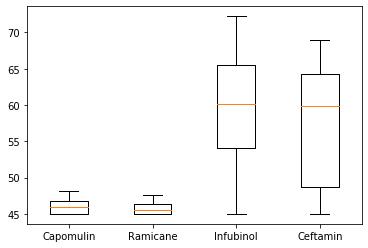

In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of 
#interest
Capomulin = cap
Ramicane = ram
Infubinol = inf
Ceftamin = cef

my_dict = {'Capomulin': Capomulin, 'Ramicane': Ramicane, 'Infubinol': Infubinol, 'Ceftamin': Ceftamin}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


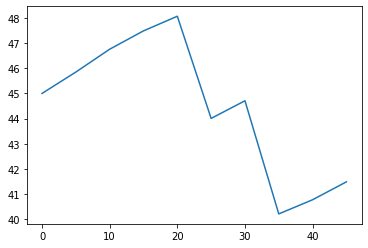

In [103]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseline = clean.loc[clean["Mouse ID"] == "l509", :]
xaxis = mouseline["Timepoint"]
yaxis = mouseline["Tumor Volume (mm3)"]
plt.plot(xaxis, yaxis)
mouseline

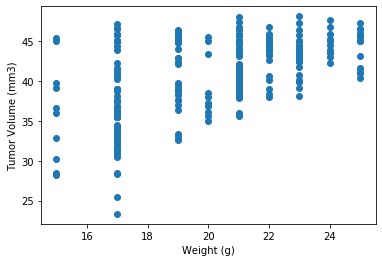

In [104]:
# Generate a scatter plot of mouse weight versus average tumor volume for the 
#Capomulin regimen
weightvol = clean.loc[clean["Drug Regimen"] == "Capomulin", :]
x_values = weightvol['Weight (g)']
y_values = weightvol['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The r-squared is: 0.2763600223455911


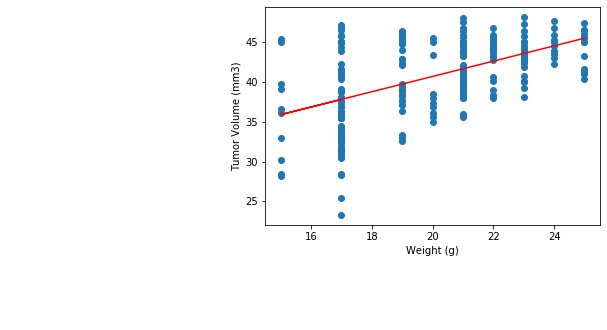

In [105]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weightvol['Weight (g)']
y_values = weightvol['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()